### Analysis
  1.  There is an obsevable correlation between the current temperature of a city and its proximity to the Equator.  A limitation of this dataset is that it is a snapshot of today's weather (August 8th), and not an average of an entire year.  The Summer Solstice occured on June 21 this year, so the Earth's Northern Hemisphere is tilted towards the sun.  This is reflected in the Temperature graph as the warmest area is near the Tropic of Cancer (23.4687 degrees Latitude), not at the Equator.
  2.  There is no strong correlation between a city's Latitude and Humidity.  It is interesting to note a relatively large percentage of cities with humidities between 80-100%, regardless of Latitude.
  3.  There is no strong correlation between a city's Latitude and Cloudiness.  There is, however, a large grouping of cities at or near 0% cloudiness.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
weather_csv = "weather_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

In [3]:
#create list to store data
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
name = []
country = []

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#cycle through cities and populate lists with data

count = 0

for city in cities:
    try:
        response = requests.get(url + "&q=" + city).json()
        
        city_lon = response['coord']['lon']
        lon.append(city_lon)
        city_lat = response['coord']['lat']
        lat.append(city_lat)
    
        city_temp = response['main']['temp']
        temp.append(city_temp)
        city_humid = response['main']['humidity']
        humid.append(city_humid)
    
        city_cloud = response['clouds']['all']
        cloud.append(city_cloud)
        city_wind = response['wind']['speed']
        wind.append(city_wind)
    
        city_name = response['name']
        name.append(city_name)
        city_country = response['sys']['country']
        country.append(city_country)
        
        count += 1
        
        print(f"Record number: {count}.  Weather data collected for {city_name}, {city_country}\n {url}&q={city}")
        
    except:
        print(f"Weather record not found for{city}. Skipping to next city\n")
        pass



Record number: 1.  Weather data collected for Madera, US
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=madera
Record number: 2.  Weather data collected for Saint-Joseph, FR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=saint-joseph
Record number: 3.  Weather data collected for Norman Wells, CA
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=norman wells
Record number: 4.  Weather data collected for Albany, US
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=albany
Record number: 5.  Weather data collected for Guerrero Negro, MX
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=guerrero negro
Record number: 6.  Weather data collected for Touros, BR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Record number: 48.  Weather data collected for Mitsamiouli, KM
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=mitsamiouli
Record number: 49.  Weather data collected for Mahebourg, MU
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=mahebourg
Record number: 50.  Weather data collected for Nome, US
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=nome
Record number: 51.  Weather data collected for Taoudenni, ML
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=taoudenni
Record number: 52.  Weather data collected for Itoman, JP
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=itoman
Weather record not found foramderma. Skipping to next city

Record number: 53.  Weather data collected for Longyearbyen, NO
 http://api.o

Record number: 93.  Weather data collected for Padang, ID
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=padang
Record number: 94.  Weather data collected for Bocaiuva, BR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=bocaiuva
Record number: 95.  Weather data collected for Tabas, IR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=tabas
Record number: 96.  Weather data collected for Ilyich, RU
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=ilyich
Record number: 97.  Weather data collected for Celestun, MX
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=celestun
Weather record not found formys shmidta. Skipping to next city

Record number: 98.  Weather data collected for Ponta do Sol, BR
 http://api.openweath

Record number: 184.  Weather data collected for Hun, BE
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=hun
Record number: 185.  Weather data collected for Antalaha, MG
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=antalaha
Record number: 186.  Weather data collected for Quesnel, CA
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=quesnel
Weather record not found forbelushya guba. Skipping to next city

Record number: 187.  Weather data collected for San Luis, AR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=san luis
Record number: 188.  Weather data collected for Dakar, SN
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=dakar
Record number: 189.  Weather data collected for Iracoubo, GF
 http://api.openweath

Record number: 229.  Weather data collected for Rawson, AR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=rawson
Record number: 230.  Weather data collected for Portland, US
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=portland
Record number: 231.  Weather data collected for Esperance, TT
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=esperance
Record number: 232.  Weather data collected for Vardo, US
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=vardo
Record number: 233.  Weather data collected for Saint-Michel-des-Saints, CA
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=saint-michel-des-saints
Weather record not found forlolua. Skipping to next city

Record number: 234.  Weather data collected for Ve

Record number: 275.  Weather data collected for Suicheng, CN
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=suicheng
Record number: 276.  Weather data collected for Iberia, PE
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=iberia
Record number: 277.  Weather data collected for Ostrovnoy, RU
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=ostrovnoy
Record number: 278.  Weather data collected for Novyy Starodub, UA
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=novyy starodub
Record number: 279.  Weather data collected for Muramatsu, JP
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=muramatsu
Record number: 280.  Weather data collected for Kaitangata, NZ
 http://api.openweathermap.org/data/2.5/weather?units=I

Record number: 322.  Weather data collected for Namatanai, PG
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=namatanai
Record number: 323.  Weather data collected for Canora, CA
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=canora
Record number: 324.  Weather data collected for Jiwani, PK
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=jiwani
Weather record not found forkapoeta. Skipping to next city

Weather record not found fornguiu. Skipping to next city

Record number: 325.  Weather data collected for Kuznechnoye, RU
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=kuznechnoye
Record number: 326.  Weather data collected for Hangu, PK
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=hangu
Record number: 327

Record number: 368.  Weather data collected for Znamenskoye, RU
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=znamenskoye
Record number: 369.  Weather data collected for Sao Joao da Barra, BR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=sao joao da barra
Record number: 370.  Weather data collected for Deputatskiy, RU
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=deputatskiy
Record number: 371.  Weather data collected for Paignton, GB
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=paignton
Record number: 372.  Weather data collected for Ploufragan, FR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=ploufragan
Record number: 373.  Weather data collected for Sarangani, PH
 http://api.openweathermap.org/dat

Record number: 415.  Weather data collected for Mudanjiang, CN
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=mudanjiang
Record number: 416.  Weather data collected for Trenggalek, ID
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=trenggalek
Record number: 417.  Weather data collected for Micheweni, TZ
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=micheweni
Record number: 418.  Weather data collected for Meadow Lake, CA
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=meadow lake
Record number: 419.  Weather data collected for Bonfim, BR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=bonfim
Record number: 420.  Weather data collected for Mecca, SA
 http://api.openweathermap.org/data/2.5/weather?units=Imperi

Record number: 461.  Weather data collected for Alzamay, RU
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=alzamay
Record number: 462.  Weather data collected for Batagay, RU
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=batagay
Record number: 463.  Weather data collected for West Wendover, US
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=west wendover
Record number: 464.  Weather data collected for Xam Nua, LA
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=xam nua
Record number: 465.  Weather data collected for Pedernales, EC
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=pedernales
Record number: 466.  Weather data collected for Raudeberg, NO
 http://api.openweathermap.org/data/2.5/weather?units=Imperi

Record number: 508.  Weather data collected for Gatehouse of Fleet, GB
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=gatehouse of fleet
Record number: 509.  Weather data collected for Bryanka, UA
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=bryanka
Record number: 510.  Weather data collected for Muros, ES
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=muros
Record number: 511.  Weather data collected for Cockburn Town, TC
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=cockburn town
Record number: 512.  Weather data collected for Terra Santa, BR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=terra santa
Record number: 513.  Weather data collected for Coquimbo, CL
 http://api.openweathermap.org/data/2.5/w

Record number: 553.  Weather data collected for Portree, GB
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=portree
Record number: 554.  Weather data collected for Iquitos, PE
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=iquitos
Record number: 555.  Weather data collected for Carauari, BR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=carauari
Record number: 556.  Weather data collected for Sao Jose da Coroa Grande, BR
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=sao jose da coroa grande
Record number: 557.  Weather data collected for Havre-Saint-Pierre, CA
 http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18bd02074aef8d410422de96e1d52a7d&q=havre-saint-pierre
Record number: 558.  Weather data collected for Nandikotkur, IN
 http://api.openwe

In [12]:
#dataframe
weather = pd.DataFrame({
    "City": name,
    "Country": country,
    "Temperature": temp,
    "Humidity" : humid,
    "Cloudiness" : cloud,
    "Wind" : wind,
    "Latitude" : lat,
    "Longitude" : lon
})


weather.to_csv(weather_csv, index = False)

weather.head()

,City,Country,Temperature,Humidity,Cloudiness,Wind,Latitude,Longitude
0,Madera,US,90.68,31,1,3.36,36.96,-120.06
1,Saint-Joseph,FR,70.92,83,12,4.70,43.56,6.97
2,Norman Wells,CA,50.00,87,90,9.17,65.28,-126.83
3,Albany,US,82.40,45,20,13.87,42.65,-73.75
4,Guerrero Negro,MX,85.58,74,76,4.52,27.97,-114.04


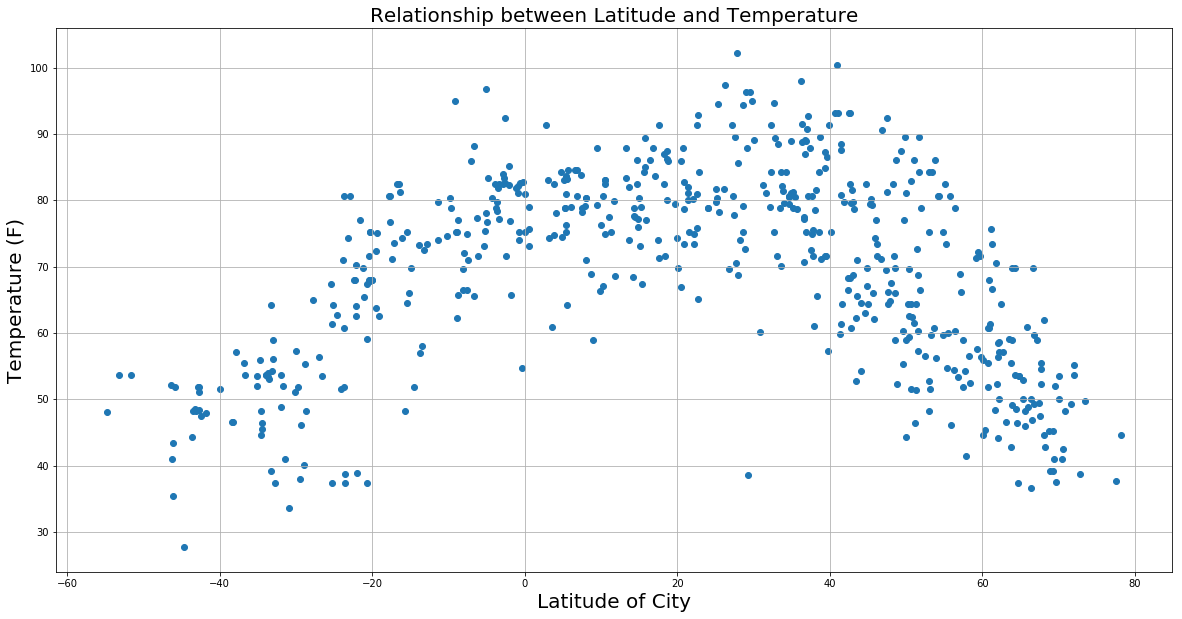

In [20]:
# temp plot
plt.figure(figsize = (20,10))
plt.scatter(lat, temp)
plt.ylabel("Temperature (F)", fontsize = 20)
plt.xlabel("Latitude of City", fontsize = 20)
plt.title("Relationship between Latitude and Temperature", fontsize = 20)
plt.grid()

plt.savefig("Temp.png")

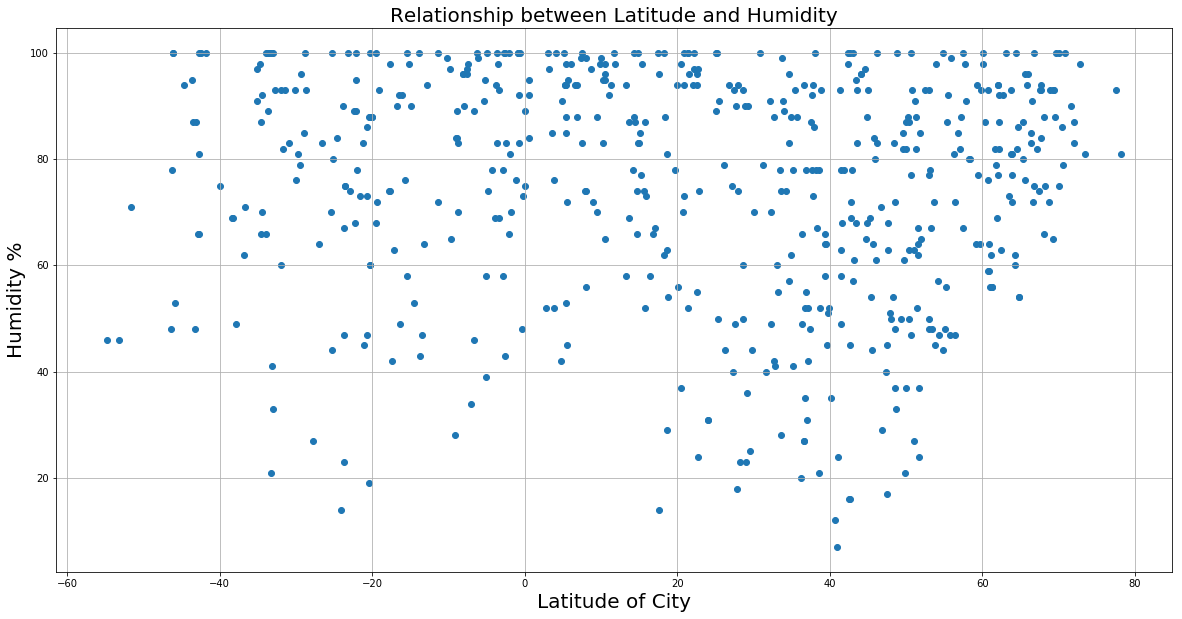

In [7]:
#humidity graph

plt.figure(figsize = (20,10))
plt.scatter(lat, humid)
plt.ylabel("Humidity %", fontsize = 20)
plt.xlabel("Latitude of City", fontsize = 20)
plt.title("Relationship between Latitude and Humidity", fontsize = 20)
plt.grid()

plt.savefig("Humid.png")

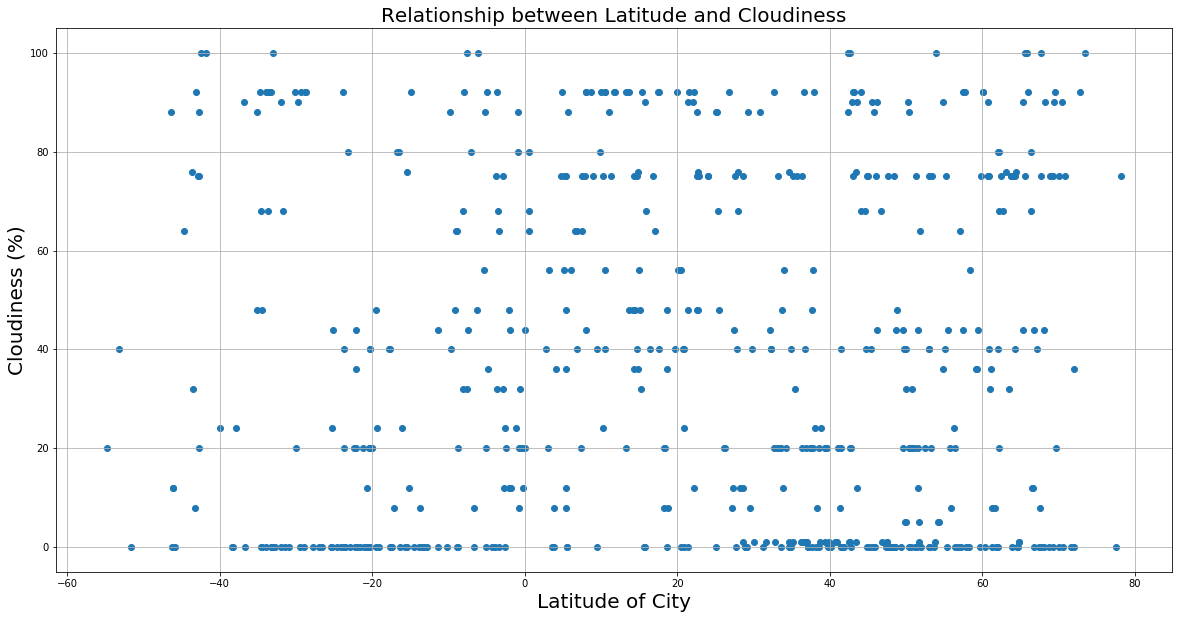

In [8]:
#cloudiness graph
plt.figure(figsize = (20,10))
plt.scatter(lat, cloud)
plt.ylabel("Cloudiness (%)", fontsize = 20)
plt.xlabel("Latitude of City", fontsize = 20)
plt.title("Relationship between Latitude and Cloudiness", fontsize = 20)
plt.grid()

plt.savefig("Cloud.png")

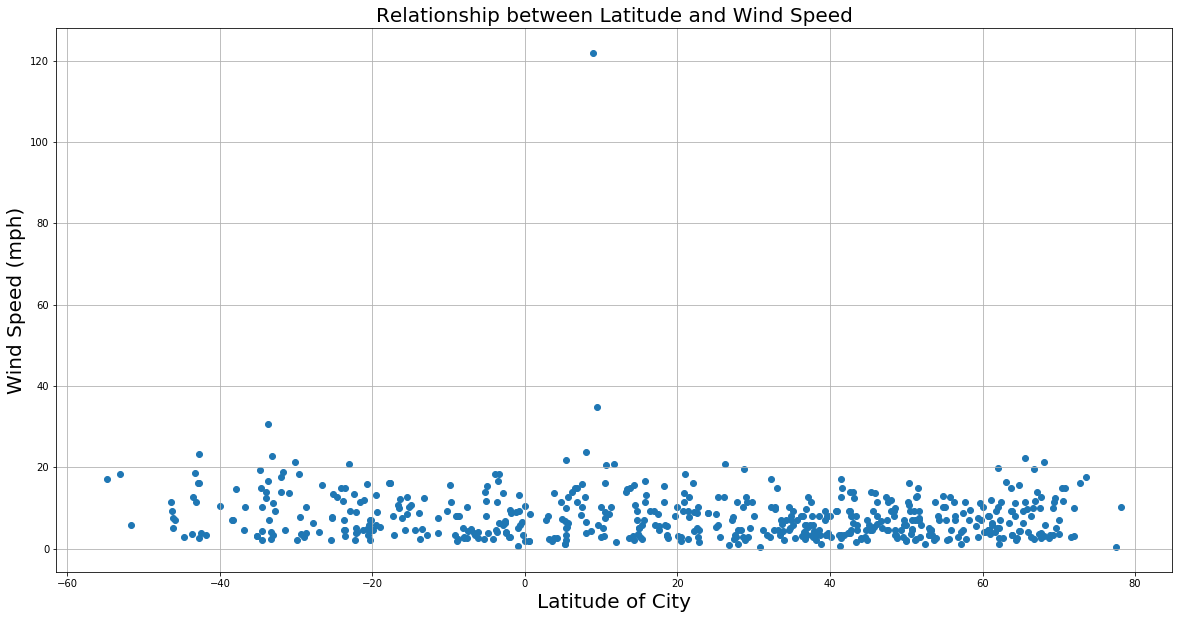

In [9]:
#wind graph

plt.figure(figsize = (20,10))
plt.scatter(lat, wind)
plt.ylabel("Wind Speed (mph)", fontsize = 20)
plt.xlabel("Latitude of City", fontsize = 20)
plt.title("Relationship between Latitude and Wind Speed", fontsize = 20)
plt.grid()

plt.savefig("Wind.png")

In [16]:
#Where is it that windy? Lebu, Ethiopia.  
windy = weather.loc[weather['Wind'] > 80]
windy

,City,Country,Temperature,Humidity,Cloudiness,Wind,Latitude,Longitude
133,Lebu,ET,59.0,72,75,121.91,8.96,38.73


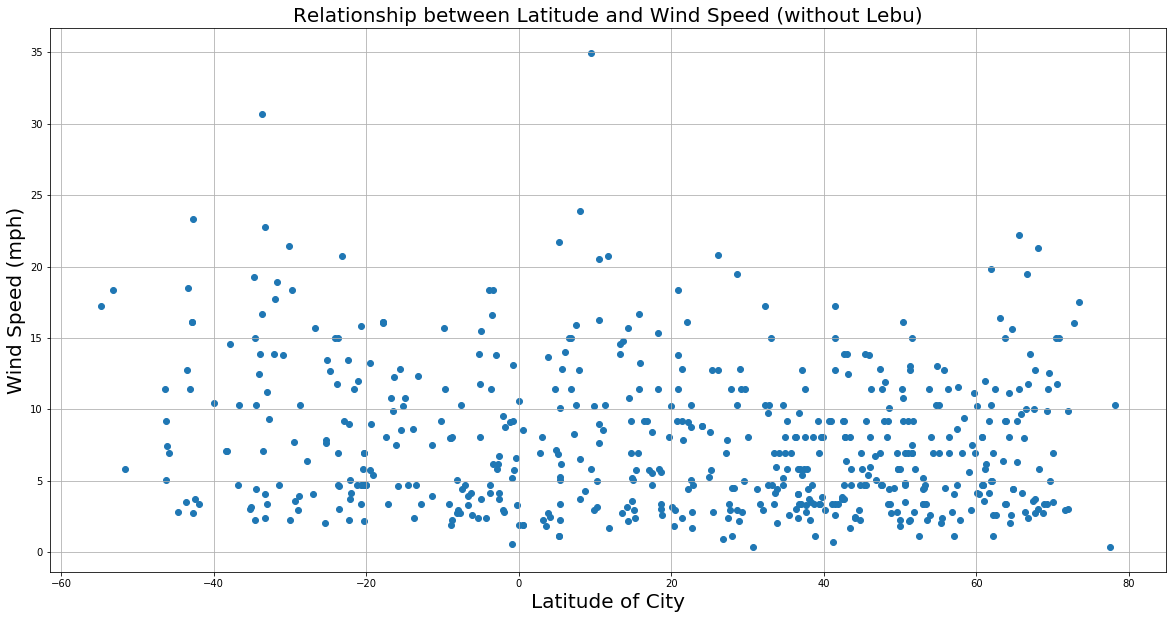

In [22]:
#get rid of outlier
weather_norm = weather.drop(133)

plt.figure(figsize = (20,10))
plt.scatter(weather_norm["Latitude"], weather_norm["Wind"])
plt.ylabel("Wind Speed (mph)", fontsize = 20)
plt.xlabel("Latitude of City", fontsize = 20)
plt.title("Relationship between Latitude and Wind Speed (without Lebu)", fontsize = 20)
plt.grid()

plt.savefig("Wind2.png")

Text(0.5,1,'Where Measurements Were Taken')

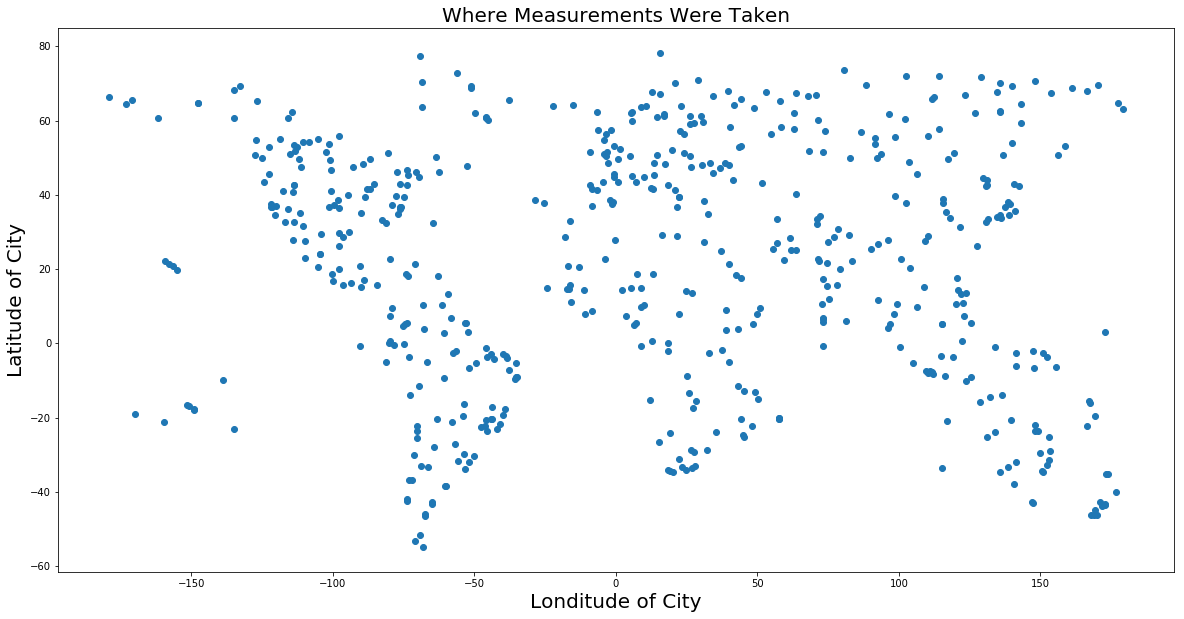

In [25]:
#Looks like Earth
plt.figure(figsize = (20,10))
plt.scatter(lon, lat)
plt.ylabel("Latitude of City", fontsize = 20)
plt.xlabel("Londitude of City", fontsize = 20)
plt.title("Where Measurements Were Taken", fontsize = 20)

